In [ ]:
from qiskit import *
import numpy as np
usim = Aer.get_backend('aer_simulator')
from qiskit.circuit.library.standard_gates import HGate, XGate
from qiskit.circuit import ControlledGate
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# from Walks import *
from Coins import HadamardCoin, GroverCoin
from Walks import QuantumWalk, Boundary, QuantumWalk1D, QuantumWalk2D, OneWayBoundary
# from DiffusionProject.scripts.Coins import GroverCoin

In [3]:
size = 2
qc = QuantumCircuit(size)
qc.h([0,1])
coin_gate = qc.to_gate(label = "Hadamard Coin")
coin_gate.inverse()

qc = QuantumCircuit(size)
qc.x([0,1])
coin_reversal_gate = qc.to_gate(label = "X Gate")


MCH2 = coin_gate.control(num_ctrl_qubits=2,ctrl_state="01")
MCX2 = coin_reversal_gate.control(num_ctrl_qubits=2,ctrl_state="01")


coin_register = QuantumRegister(2,name = 'coin')
state_register = QuantumRegister(2,name = 'state')
registers = [coin_register,state_register]
quantumcircuit = QuantumCircuit(*registers)
quantumcircuit.x(state_register[0])

quantumcircuit.append(MCH2,state_register[:] + coin_register[:])

quantumcircuit.append(MCX2,state_register[:] + coin_register[:])



quantumcircuit.decompose()
# quantumcircuit.decompose()
quantumcircuit.draw('mpl')

# shots = 1024
# quantum_circuit_copy = quantumcircuit.copy()
# quantum_circuit_copy.measure_all()
# transpiled_circuit = transpile(quantum_circuit_copy, usim)
# qobj = assemble(transpiled_circuit,shots = shots)
# results = usim.run(qobj).result()
# counts = results.get_counts()
# print(counts)




MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

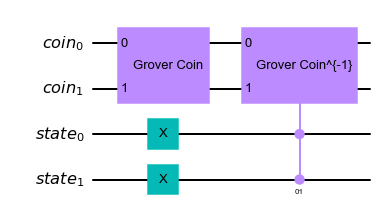

In [ ]:
grover_coin = GroverCoin(2)

mc_grover_inverse = grover_coin.control(2,"01",True)


coin_register = QuantumRegister(2,name = 'coin')
state_register = QuantumRegister(2,name = 'state')
registers = [coin_register,state_register]
quantumcircuit = QuantumCircuit(*registers)
quantumcircuit.x(state_register[:])
quantumcircuit.append(grover_coin.gate,coin_register[:])
quantumcircuit.append(mc_grover_inverse,state_register[:] + coin_register[:])

quantumcircuit.draw('mpl')

In [7]:


shots = 1024
quantum_circuit_copy = quantumcircuit.copy()
quantum_circuit_copy.measure_all()
transpiled_circuit = transpile(quantum_circuit_copy, usim)
qobj = assemble(transpiled_circuit,shots = shots)
results = usim.run(qobj).result()
counts = results.get_counts()
print(counts)

{'1100': 1024}


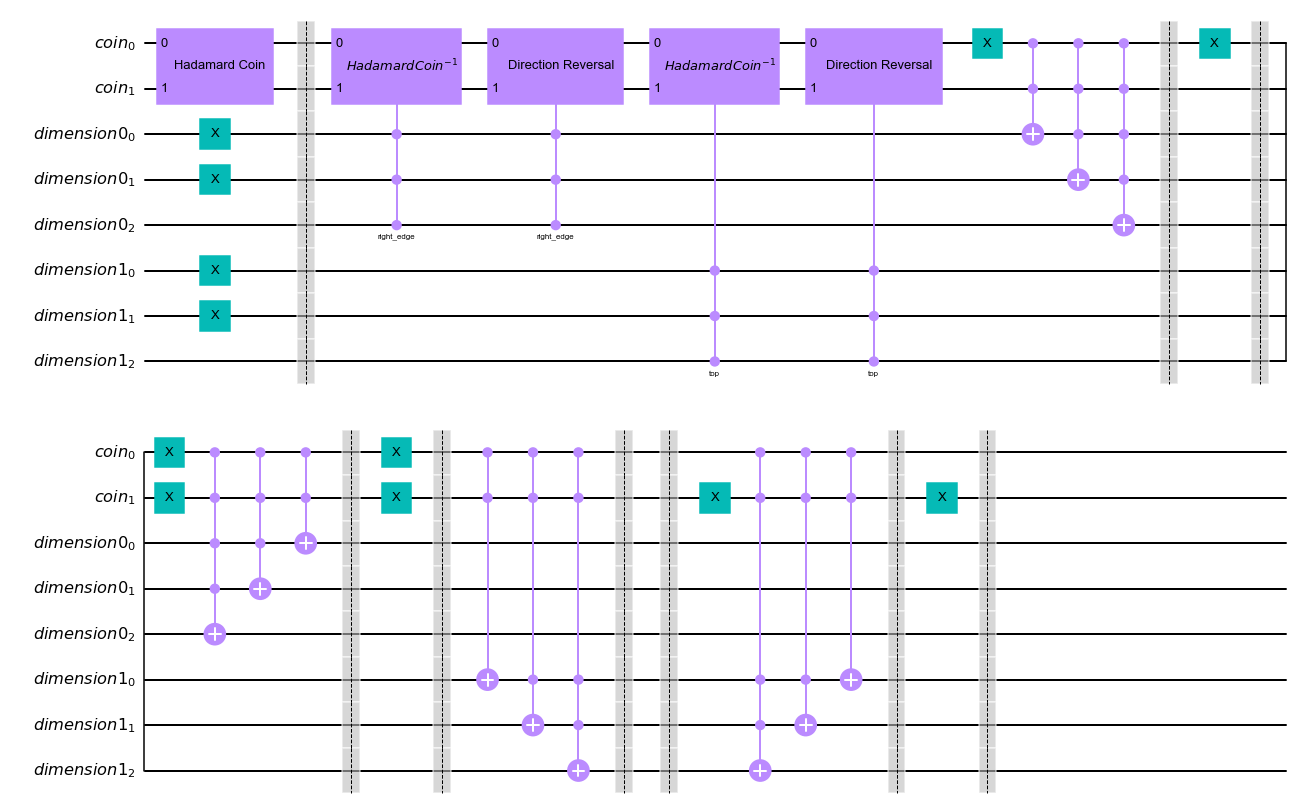

In [2]:


boundary_right_edge = Boundary("111",label="right_edge", dimension = 0)
boundary_top = Boundary("111",label="top", dimension= 1)
walk = QuantumWalk2D([3,3],initial_states=["011","011"],coin_class=HadamardCoin, boundaries=[boundary_right_edge, boundary_top])
walk.step()

walk.quantum_circuit.draw('mpl')

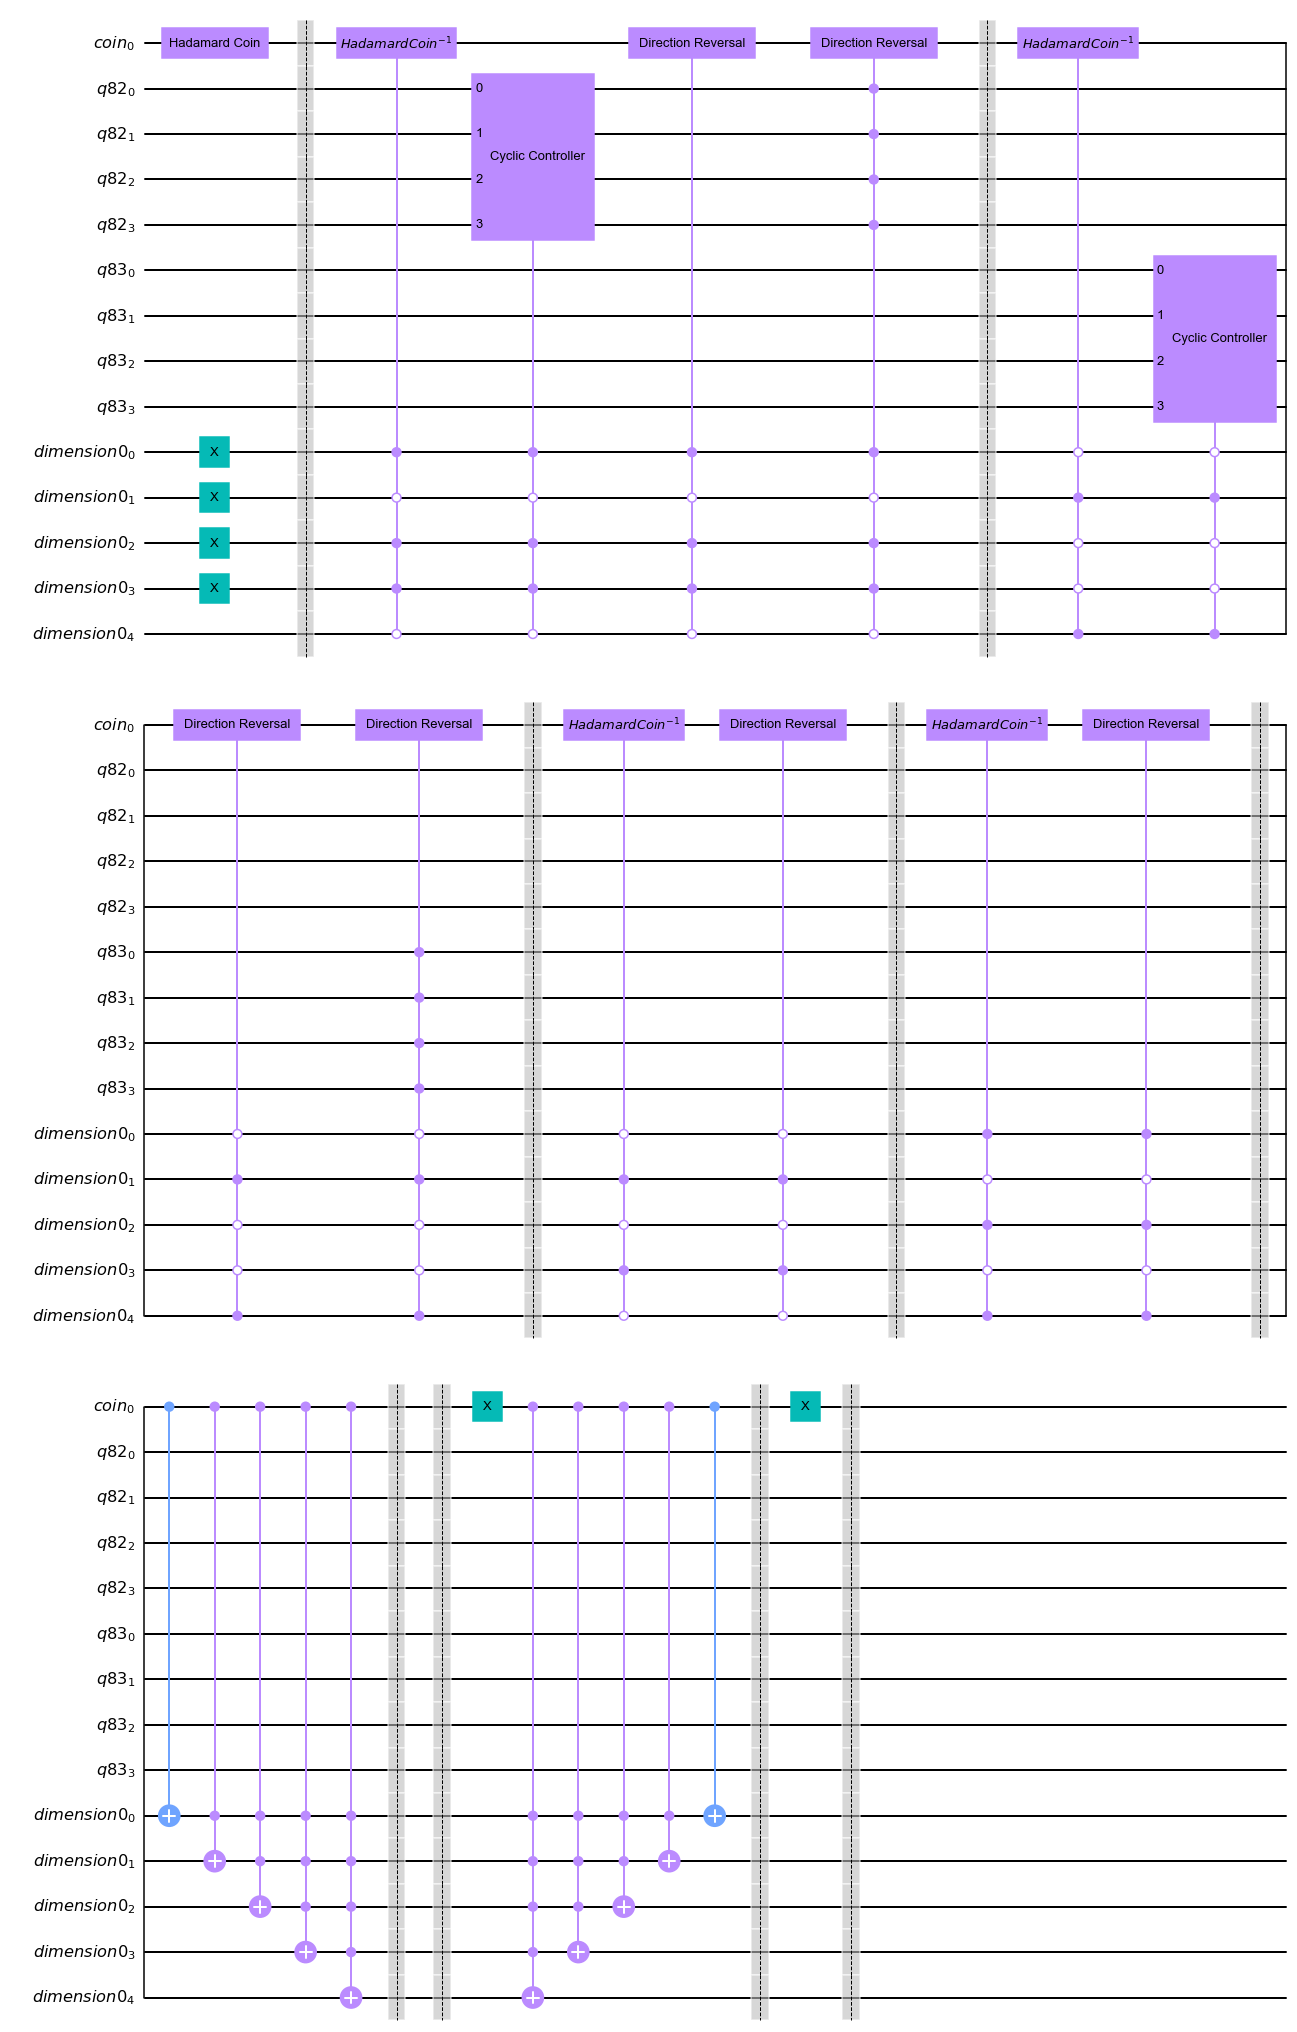

In [4]:
boundaries = []

for bitstring in ["01101","10010"]:
    boundaries.append(OneWayBoundary(bitstring,n_boundary_cycle_bits=4))

for bitstring in ["01010","10101"]:
    boundaries.append(Boundary(bitstring))

walk = QuantumWalk1D(5,"01111",boundaries=boundaries)
walk.step()
walk.quantum_circuit.draw('mpl')
# walk.quantum_circuit.num_qubits



/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


{'dimension_0': [18, 10, 20, 16, 12, 14], 'probability_density': [0.009765625, 0.015625, 0.51171875, 0.0146484375, 0.330078125, 0.1181640625]}


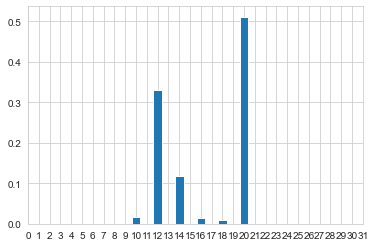

In [6]:
# x,alpha = walk.get_results()
# plt.bar(x,alpha)
# plt.xticks([i for i in range(16)])
# plt.show()


# walk.step()
# 
walk.run_n_steps(10)
# print(walk.get_state_register_indices())
results = walk.get_results()
print(results)
plt.bar(results['dimension_0'],results['probability_density'])
plt.xticks([i for i in range(32)])
# plt.cla()
plt.show()



In [23]:
counts = {'11110000': 134, '10000001': 112, '01100011': 249, '10000000': 529}


In [30]:
_ , last_state_idx = walk.get_state_register_indices()
        
counts_new = {}
        
for bitstring, count in counts.items():
    print(bitstring)
    state_bitstring = bitstring[:last_state_idx+1]
    print(state_bitstring)
    print(counts_new.get(state_bitstring))
    if counts_new.get(state_bitstring):
        
        counts_new[state_bitstring] += count

    else:
        counts_new[state_bitstring] = count
    print(counts_new.get(state_bitstring))


        
counts_new

11110000
11110
None
134
10000001
10000
None
112
01100011
01100
None
249
10000000
10000
112
641


{'11110': 134, '10000': 641, '01100': 249}

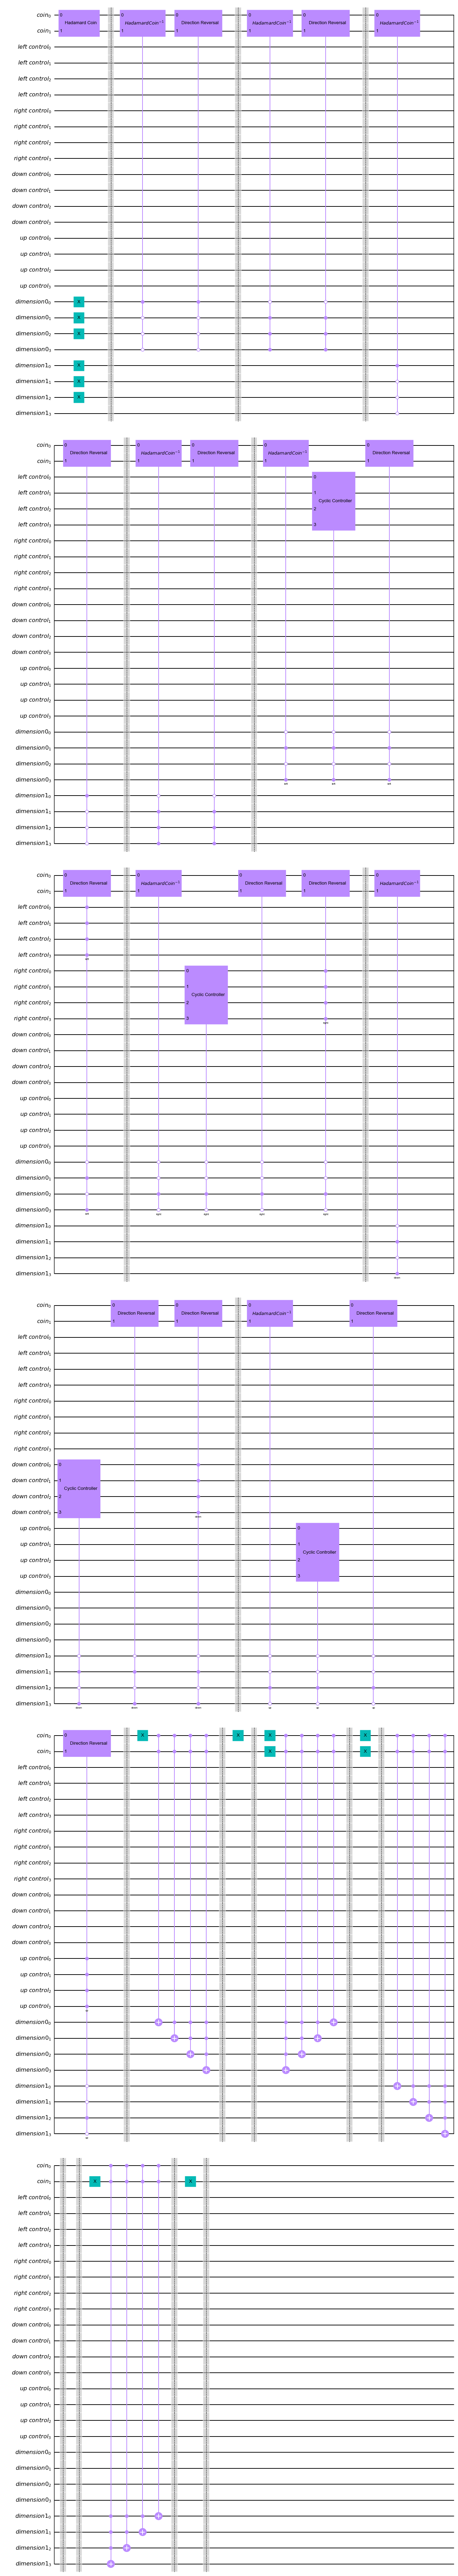

In [2]:


walk.quantum_circuit.draw('mpl')

# x,y,alpha = walk.get_results()



# plt.scatter(x,y,alpha=[i**(1/n_qubits) for i in alpha],linewidths=[i*n_qubits*20 for i in alpha], s = [i*n_qubits*500 for i in alpha])
# plt.show()

# print(results)

/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'DiffusionProject/scripts/plots/oneway_4cyclequbits_exp1.png'

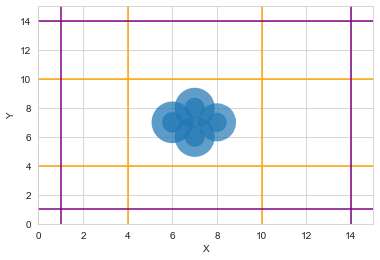

In [3]:

for experiment_number in range(1,30):
    results = walk.get_results(shots=512)
    x,y,alpha = results["dimension_0"],results["dimension_1"],results["probability_density"]
    plt.scatter(x,y,alpha=[i**(1/n_qubits) for i in alpha],linewidths=[20*(i*n_qubits)**0.5 for i in alpha], s = [400*(i*n_qubits)**0.5 for i in alpha])
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.plot([10,10],[0,15],"orange")
    plt.plot([4,4],[0,15],"orange")
    plt.plot([0,15],[10,10],"orange")
    plt.plot([0,15],[4,4],"orange")

    plt.plot([1,1],[0,15],"purple")
    plt.plot([14,14],[0,15],"purple")
    plt.plot([0,15],[1,1],"purple")
    plt.plot([0,15],[14,14],"purple")

    plt.xlim(0, 15)
    plt.ylim(0, 15)
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.title('diffusion with a soft boundary')



    plt.savefig("DiffusionProject/scripts/plots/oneway_4cyclequbits_exp{}.png".format(experiment_number),dpi = 300)
    plt.cla()
    walk.step()
   



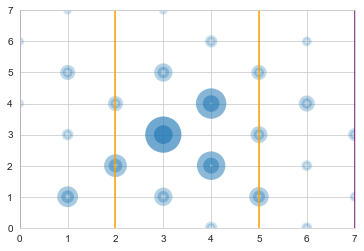

0.259765625


In [55]:
walk.run_n_steps(15)
results = walk.get_results(shots=512)
x,y,alpha = results["dimension_0"],results["dimension_1"],results["probability_density"]
plt.scatter(x,y,alpha=[i**(1/n_qubits) for i in alpha],linewidths=[20*(i*n_qubits)**0.5 for i in alpha], s = [400*(i*n_qubits)**0.5 for i in alpha])
plt.xlim(0,7)
plt.ylim(0,7)
plt.plot([2,2],[0,7],"orange")
plt.plot([5,5],[0,7],"orange")
# plt.plot([4,11],[4,4],"orange")
# plt.plot([4,11],[11,11],"orange")

plt.plot([0,0],[0,7],"purple")
plt.plot([7,7],[0,7],"purple")
# plt.plot([1,14],[1,1],"purple")
# plt.plot([1,14],[14,14],"purple")

plt.show()

outside = 0
for xi,alphai in zip(x,alpha):
    if xi <2 or xi>4:
        outside +=alphai

print(outside)

In [39]:
one_way = results


In [ ]:
for 

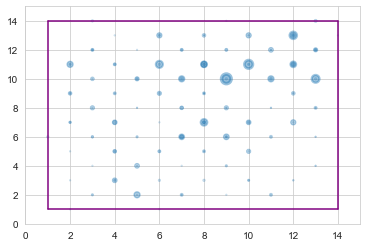

In [8]:
n_qubits = 4
boundaries = []

# apply hard boundary
for dimension, bitstring in zip([0,0],["0001","1110"]):
    
    boundaries.append(Boundary(bitstring,dimension=dimension))

# # apply soft boundary
# for dimension, bitstring, name in zip([0,0,1,1],["1011","0100","1011","0100"],["left","right","bottom","top"]):
    
#     boundaries.append(OneWayBoundary(bitstring = bitstring,dimension=dimension,n_boundary_cycle_bits=4, label=name))

walk = QuantumWalk2D([n_qubits,n_qubits],["0111","0111"],coin_class=HadamardCoin,boundaries=boundaries)
walk.step()
walk.run_n_steps(30)

results = walk.get_results(shots=512)
x,y,alpha = results["dimension_0"],results["dimension_1"],results["probability_density"]
plt.scatter(x,y,alpha=[i**(1/n_qubits) for i in alpha],linewidths=[i*n_qubits*20 for i in alpha], s = [i*n_qubits*500 for i in alpha])
plt.xlim(0,15)
plt.ylim(0,15)
# plt.plot([4,4],[0,15],"orange")
# plt.plot([11,11],[0,15],"orange")
# plt.plot([4,11],[4,4],"orange")
# plt.plot([4,11],[11,11],"orange")

plt.plot([1,1],[0,15],"purple")
plt.plot([14,14],[0,15],"purple")
# plt.plot([1,14],[1,1],"purple")
# plt.plot([1,14],[14,14],"purple")

plt.show()

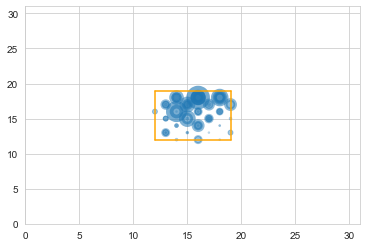

In [10]:
results = walk.get_results(shots=512)
x,y,alpha = results["dimension_0"],results["dimension_1"],results["probability_density"]
plt.scatter(x,y,alpha=[i**(1/n_qubits) for i in alpha],linewidths=[i*n_qubits*20 for i in alpha], s = [i*n_qubits*500 for i in alpha])
plt.xlim(0,31)
plt.ylim(0,31)
plt.plot([12,12],[12,19],"orange")
plt.plot([19,19],[12,19],"orange")
plt.plot([12,19],[12,12],"orange")
plt.plot([12,19],[19,19],"orange")
plt.show()
walk.run_n_steps(15)
walk.run_n_steps(30)

In [4]:
plt.scatter(x,y,alpha=[i**(1/n_qubits) for i in alpha],linewidths=[i*n_qubits*20 for i in alpha], s = [i*n_qubits*500 for i in alpha])
plt.xlim(0,31)
plt.ylim(0,31)
plt.plot([4,4],[4,19],"orange")
plt.plot([19,19],[4,19],"orange")
plt.plot([4,19],[12,12],"orange")
plt.plot([4,19],[4,4],"orange")

plt.plot([10,10],[10,21],"purple")
plt.plot([21,21],[10,21],"purple")
plt.plot([10,21],[10,10],"purple")
plt.plot([10,21],[21,21],"purple")

plt.show()

NameError: name 'x' is not defined

[0]
[0, 1]


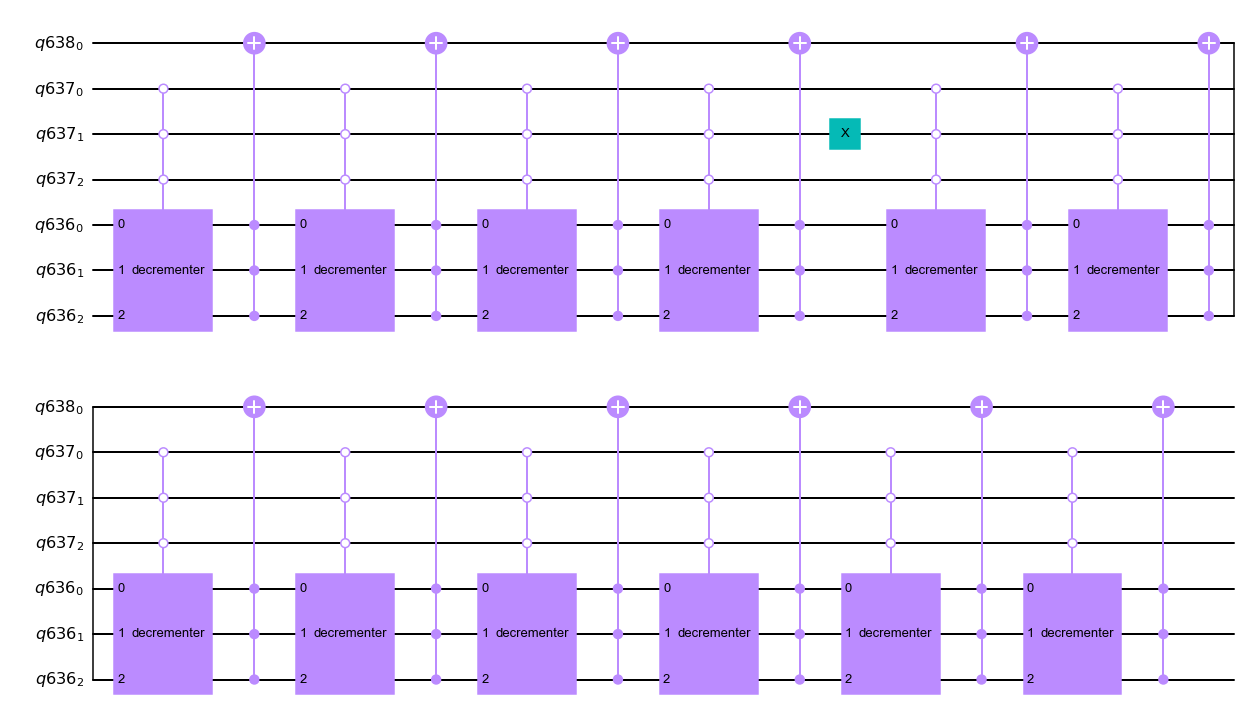

In [44]:
boundary_cycle_bits = 3
n_state_bits = 3
incrementer = QuantumCircuit(boundary_cycle_bits)
incrementer.x(0)
for idx in range(1,boundary_cycle_bits):
    control_indices = [i for i in range(idx)]
    print(control_indices)
    incrementer.mct(control_indices,idx)

incrementer.draw('mpl')

incrementerGate = incrementer.to_gate(label = "decrementer")
incrementerControl = incrementerGate.control(num_ctrl_qubits=n_state_bits,ctrl_state="000")
reversal = XGate().control(num_ctrl_qubits=boundary_cycle_bits,ctrl_state="111")


boundary_cycle_register = QuantumRegister(boundary_cycle_bits)
state_register = QuantumRegister(n_state_bits)
control_register = QuantumRegister(1)

qc = QuantumCircuit(control_register,state_register,boundary_cycle_register)

for _ in range(4):
    qc.append(incrementerControl,state_register[:]+boundary_cycle_register[:])
    qc.append(reversal,boundary_cycle_register[:]+control_register[:])
    qc.draw('mpl')


qc.x(state_register[1])

for _ in range(8):
    qc.append(incrementerControl,state_register[:]+boundary_cycle_register[:])
    qc.append(reversal,boundary_cycle_register[:]+control_register[:])
    qc.draw('mpl')

qc.draw('mpl')








In [45]:
shots = 1024
quantum_circuit_copy = qc.copy()
quantum_circuit_copy.measure_all()
transpiled_circuit = transpile(quantum_circuit_copy, usim)
qobj = assemble(transpiled_circuit,shots = shots)
results = usim.run(qobj).result()
counts = results.get_counts()
print(counts)

{'1000101': 1024}


In [17]:
circ = QuantumCircuit(4)
circ.x(0)
for i in range(9):
    iterations = i
    for _ in range(iterations):

        circ.mct([3,2,1],0)
        circ.append(XGate().control(3,ctrl_state="010"),[3,2,1,0])
        circ.draw()
        circ.cx(0,3)
        circ.cx(0,2)
        circ.cx(0,1)

        circ.mct([1,2],3)
        circ.cx(1,2)
        circ.x(1)

    shots = 1024
    quantum_circuit_copy = circ.copy()
    quantum_circuit_copy.measure_all()
    transpiled_circuit = transpile(quantum_circuit_copy, usim)
    qobj = assemble(transpiled_circuit,shots = shots)
    results = usim.run(qobj).result()
    counts = results.get_counts()
    print(counts)



/Volumes/Extreme SSD/AEROY4/Simulation-of-a-Quantum-Computer/qiskit-env/lib/python3.7/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


{'0001': 1024}
{'0001': 1024}
{'0001': 1024}
{'0001': 1024}
{'0001': 1024}
{'0001': 1024}
{'0001': 1024}
{'0001': 1024}
{'0001': 1024}


{'1100': 1024}
